| ![nsdf](https://www.sci.utah.edu/~pascucci/public/NSDF-smaller.PNG)  | [National Science Data Fabric](https://nationalsciencedatafabric.org/) [Jupyter notebook](https://jupyter.org/) <br> created by  [Valerio Pascucci](http://cedmav.com/) and  [Giorgio Scorzelli](https://www.sci.utah.edu/people/scrgiorgio.html)  |  
|---|:---:|


# Distribution of the data related by the following book chapter: 

### Cahpter 1.18 - Retinal Connectomics 

__Authors:__  _[Bryan W. Jones](http://marclab.org/outreach/people/bryan-w-jones/), and [Robert E. Marc.](https://marclab.org/outreach/people/robert-e-marc/)_ 

__Published in:__  The Senses: A Comprehensive Reference, Elsevier, 2nd Edition - September 8, 2020, Pages 320-343, ISBN  9780128054086

https://www.elsevier.com/books/the-senses-a-comprehensive-reference/fritzsch/978-0-12-805408-6



#  <center> This is a preview of the 6.4 TB of EM data
![Connectomics EM Data](https://www.sci.utah.edu/~pascucci/public/RabbitRetinaEM.gif)

# Import OpenVisus and Load dataset

In [1]:
import os,sys
import matplotlib.pyplot as plt, skimage
%matplotlib notebook

sys.path.append("c:/projects/openvisus/build/RelWithDebInfo")
sys.path.append("c:/projects/openvisuspy/src")


def ShowData(data,extent):
    fig, ax = plt.subplots()
    im = ax.imshow(data, extent=extent) 
    plt.colorbar(im)
    return fig,im,ax

from openvisuspy import LoadDataset, ExecuteBoxQuery,SetupLogger
SetupLogger(stream=False)

url='https://atlantis.sci.utah.edu/mod_visus?dataset=rabbit&cached=1'
db=LoadDataset(url)
print(f"Loaded dataset \nfields={db.getFields()} \nlogic_box={db.getLogicBox()}")
W,H=db.getLogicBox()[1]
access=db.createAccess()

Loaded dataset 
fields=['EM'] 
logic_box=([0, 0], [131072, 131072])


# Display a single XY slice

data.shape=(2048, 2048) extent=[0, 131072, 0, 131072]


<IPython.core.display.Javascript object>


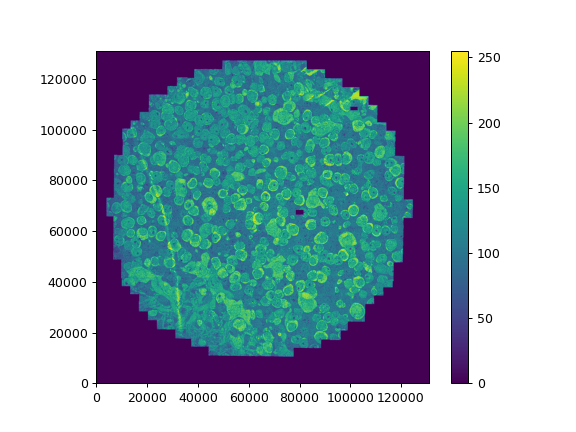

In [2]:
def ReadData(cx, cy, zoom, quality=0, timestep=1, verbose=True): 
    x1,x2 = int(cx - zoom*W*0.5), int(cx + zoom*W*0.5)
    y1,y2 = int(cy - zoom*H*0.5), int(cy + zoom*H*0.5)  
    maxh=db.getMaxResolution()
    endh=maxh+quality
    aligned_box, delta, num_pixels = db.getAlignedBox([[x1,y1],[x2,y2]], endh)
    (x1,y1),(x2,y2)=aligned_box
    extent=[x1,x2,y1,y2]     
    
    for it in ExecuteBoxQuery(db, access=access, logic_box=aligned_box, timestep=timestep, endh=endh, num_refinements=1):
        data=it['data']
        if verbose: print(f"data.shape={data.shape} extent={extent}")
        return data, extent

data,extent = ReadData(W//2,H//2,quality = -12, zoom=1.0)
ShowData(data,extent)
plt.show() 

# Mark the area of interest and show it

data.shape=(205, 205) extent=[58944, 72064, 58944, 72064]


<IPython.core.display.Javascript object>


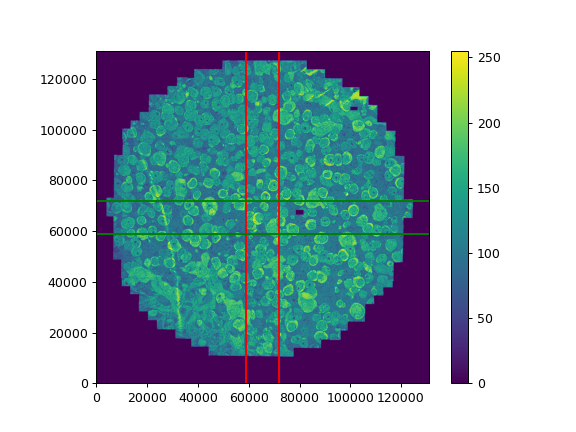

<IPython.core.display.Javascript object>


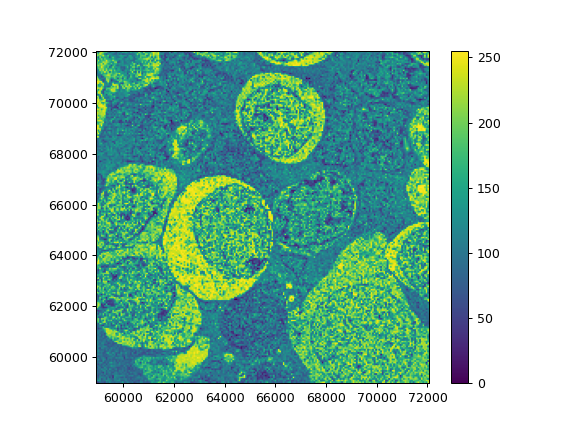

In [3]:
piece_data, piece_extent = ReadData(W//2,H//2,zoom=0.1,quality=-12)
ShowData(data,extent)

x1,x2,y1,y2=piece_extent
plt.plot([x1,x1],[ 0, H], color='r')
plt.plot([x2,x2],[ 0, H], color='r')
plt.plot([ 0, W],[y1,y1], color='g')  
plt.plot([ 0, W],[y2,y2], color='g')  
plt.show()

ShowData(piece_data,piece_extent)
plt.show()